# Assignment 4

This notebook shows how to learn the structure of a Bayesian net using search in a restricted state space. The restriction is defined by variable ordering. The models are evaluated using the Bayesian information criterion.

Since we are dealing with a variable structure, we need to store it in some way. We do it using two lists:
  - One list contains the (conditional) probability tables (CPTs) of the variables; This list will usually be called ```dists``` in this notebook.
  - The second list contains list of indices that denote to which columns in the data the dimensions of the corresponding CPTs belong to as lists. This list will usually be called ```indices``` in this notebook.
  
For example, assume we have three random variables A, B, and C. The data is stored accordingly. Further assume we want to encode the model that factorises in the following way:
$$ P(A, B, C) = P(A) * P(B \mid A) * P(C \mid A, B).$$

The two lists will then look like this (following the same conventions as used in the previous exercises):

```python
dists = [A, B_A, C_AB]
indices = [[0], [1, 0], [2, 0, 1]]
```

## Additional Libraries

For printing the network structure, you will need the ```networkx``` library installed. If you installed the Anaconda Python distribution, just use the following command:

```
   conda install networkx
```

## Passing functions as parameters

In Python, functions are [first-class citizens](https://en.wikipedia.org/wiki/First-class_function). This means, you can pass them as parameters to other functions:

In [2]:
def my_foo(func):
    print func(3)

def my_bar(num):
    return 'baz {}'.format(num)

def my_bar2(num):
    return 'bzz {}'.format(num)

my_foo(func = my_bar2)

bzz 3


We will use this to pass different ```score``` functions to the ```learn_net``` function.

# Structure Learning

In [3]:
import itertools as it
import networkx as nx   # necessary for network structure plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Helper Functions

In [4]:
def mle(data, var, parents=None):
    """
    Does maximum likelihood estimation of the (conditional) probability distribution
    of a random variable given the data.
    
    :param data:    data to use for estimating the distribution
    :param var:     index of the variable to estimate the distribution for
    :param parents: parents (ids of given variables) of the variable in the Bayes net,
                    given as list. If None or of length 0, the variable is assumed to have no parents.
    :return:        Estimated (conditional) probability distribution of the random variable
    """
    parents = parents or []
    n_vars = len(parents) + 1
    
    Y = data[:, [var] + parents]
    X = empty((2,) * n_vars)
    
    for vals in it.product([0, 1], repeat=n_vars):
        X[vals] = np.sum(np.all(Y == vals, axis=1))
        
    return X / X.sum(0)


def log_likelihood(data, dists, indices):
    """
    Computes the log likelihood of the data given a model. A model is given as a list
    of distributions (conditional probability tables) and corresponding indices describing
    which dimension of each distribution corresponds to which random variable. E.g., 
    assume you have data for three random variables A, B and C given in alphabetical order.
    If dists looks like [A_B, B, C_AB], indices would be [(0, 1), (1,), (2, 0, 1)].
    
    :param dists:   list of (conditional) probability tables for the random variables
    :param indices: list of variable indices corresponding to the CPTs stored in 'dists'
    :param data:    data to compute the log-likelihood of
    :return:        log-likelihood of data given the model as encoded by dists and indices
    """
    log_l = 0
    for y in data:
        for i in range(len(dists)):
            idx = indices[i]
            log_l += np.log(dists[i][tuple(y[idx])])
            
    return log_l


def mean_log_likelihood(data, dists, indices):
    """
    Computes the mean log likelihood of each data point in data.
    :param dists:   list of (conditional) probability tables for the random variables
    :param indices: list of variable indices corresponding to the CPTs stored in 'dists'
    :param data:    data to compute the log-likelihood of
    :return:        mean log-likelihood of data given the model as encoded by dists and indices
    """
    return log_likelihood(data, dists, indices) / len(data)


def bic(data, dists, indices):
    """
    Computes the Bayesian information score
    :param dists:   list of (conditional) probability tables for the random variables
    :param indices: list of variable indices corresponding to the CPTs stored in 'dists'
    :param data:    data to compute the log-likelihood of
    :return:        Bayesian information score
    """
    i = 0
    for c in indices:
        if len(c) == 1:
            i+= 1

    return log_likelihood(data, dists, indices) - 0.5 * log(len(data)) * i


In [42]:
def learn_dists(data, indices):
    a = [0] * len(indices)
    b = [0] * len(indices)

    #i = 0
    #for c in indices:
    #    a[i] = c[0]
    #    b[i] = c[1:] or []
    #    i += 1
        
    for idx,c in enumerate(indices):
        #print c[idx]
        a[idx] = c[0]
        b[idx] = c[1:] or []
        
        
    return [mle(data, a[0], b[0]), mle(data, a[1], b[1]), mle(data, a[2], b[2]), mle(data, a[3], b[3]), mle(data, a[4], b[4])]    
    

## Learn the network structure and parameters

In [56]:
def learn_net(data, score, var_ord):
    """
    Learns the structure and parameters of a Bayesian network.
    
    :param data:    data to learn the network from. Each column corresponds to a random variable
    :param score:   score function to use: bayesian information criterion or log-likelihood.
    :param var_ord: ordering of the variables as list of indices, defines how the search space is restricted.
    :return:        tuple of two lists: one holds the distributions, the other the indices of the random variables the
                    distributions represent
    """
    
    # TODO: IMPLEMENT THIS
    #dists = []
    #indices = []
    j = 0
    #for c in var_ord:
    #    indices[j] = [d]
    #    j += 1
        
    #dists = learn_dists(data, indices)
    
    #j = 0
    #for d in indices
        
    
    
    
    #score(data, dists, indices)
    
    
    x = [0]
    y = []
    l = [0, 1, 2, 3, 4]
    lon = [4, 3, 2, 1]
    for id3, a in enumerate(lon):
        j = -lon[id3]+1
        if j == 0: j = None
        y = []
        for a in l[0:j]:
            b = list(it.combinations(l[0:-lon[id3]], a))
            for c in b:
                d = list(c)
                d.sort(reverse=True)
                d.insert(0, id3+1)
                y.append(d)
        x.append(y)
        del y, j




    #l2 = [4, 3, 2, 1, 0]
    x[0] = [var_ord[0]]

    for f in x[1:]:
        for id1,a in enumerate(f):
            for id2,b in enumerate(a): 
                a[id2] = var_ord[a[id2]]

    i = 0
    scorelist = []
    dists3 = []
    t3 = []
    for a in x[1]:    
        for b in x[2]:
            for c in x[3]:    
                for d in x[4]:
                    i += 1
                    t = [x[0], a, b, c, d]
                    #print t[0]
                    dists2 = learn_dists(data, t)
                    dists3.append(dists2)
                    scorelist.append(score(data, dists2, t))
                    t3.append(t)
                    del t, dists2
                    
    maxScore = argmax(scorelist)                

    return dists3[maxScore], t3[maxScore]

In [32]:
def learn_params(data):
    """
    Learns the parameters of the Bayesian network with a predefined structure as given on the assignment sheet.
    
    :param data:    data to learn the network from. 
    :return:        tuple of two lists: one holds the distributions, the other the indices of the random variables the
                    distributions represent
    """
    
    # TODO: IMPLEMENT THIS

    #dists = [mle(Y, 0), mle(Y, 1, [0]), mle(Y, 2), mle(Y, 3, [2, 0]), mle(Y, 4, [3])]
    indices = [[0], [1, 0], [2], [3, 2, 0], [4, 3]]
    
    dists = learn_dists(data, indices)

    return dists, indices

## Load data

In [33]:
Y_train_small = loadtxt('train_small.txt', dtype=int)
Y_train_medium = loadtxt('train_medium.txt', dtype=int)
Y_train_big = loadtxt('train_big.txt', dtype=int)
Y_test = loadtxt('test.txt', dtype=int)

# Learn networks and draw graphs

## Helper functions

In [34]:
def draw_graph(indices):
    """
    Draw the Bayesian net. Arrows are indicated by edges getting bolder.
    :param indices:  indices defining the structure of the net, as returned by the learn functions
    """
    node_names = ['stress', 'easily cold', 'genetic', 'blood p.', 'heart att.']
    G = nx.DiGraph()
    G.add_nodes_from(node_names)
    for i in indices:
        for p in i[1:]:
            G.add_edge(node_names[p], node_names[i[0]])
    pos=nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='white')
    
def evaluate_net(net, train_set, test_set):
    """
    Evaluates a Bayes net on a set of train and test data.
    :param net: tuple of the 'dists' and 'indices' lists
    :param train_set: training set to evaluate
    :param test_set:  test set to evaluate
    :return: log-likelihoods of train and test data as tuple
    """
    train_logl = mean_log_likelihood(train_set, *net)
    test_logl = mean_log_likelihood(test_set, *net)
    print 'Avg. train log-likelihood:', train_logl
    print 'Avg. test log-likelihood:', test_logl
    draw_graph(net[1])
    return train_logl, test_logl

## Small Train Set

### Pre-defined structure

Avg. train log-likelihood: -1.84491316649
Avg. test log-likelihood: -1.82029108112


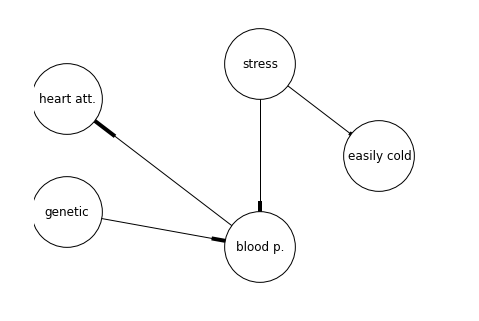

In [16]:
sm_gs_train_logl, sm_gs_test_logl = evaluate_net(
    learn_params(Y_train_small),
    Y_train_small,
    Y_test
)

### Standard Variable Order

/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


Avg. train log-likelihood: -1.83423322142
Avg. test log-likelihood: nan


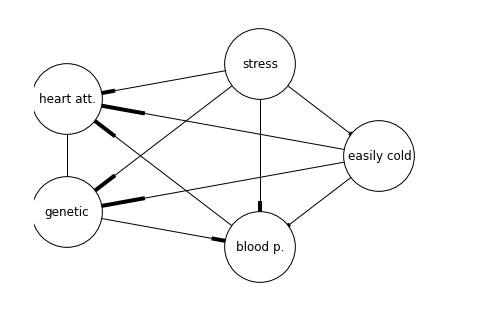

In [57]:
sm_ord_train_logl, sm_ord_test_logl = evaluate_net(
    learn_net(Y_train_small, score=bic, var_ord=range(5)),
    Y_train_small, 
    Y_test
)

### Reverse Variable Order

/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


Avg. train log-likelihood: -1.83423322142
Avg. test log-likelihood: nan


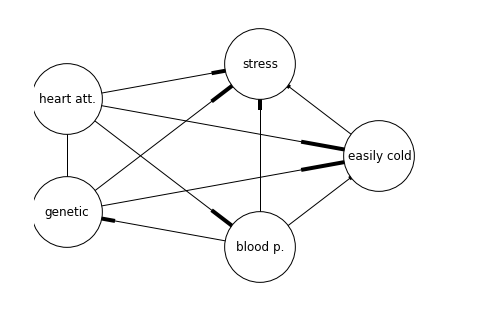

In [58]:
sm_rev_train_logl, sm_rev_test_logl = evaluate_net(
    learn_net(Y_train_small, score=bic, var_ord=range(5)[::-1]),
    Y_train_small, 
    Y_test
)

### "Random" Variable Order

/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


Avg. train log-likelihood: -1.83423322142
Avg. test log-likelihood: nan


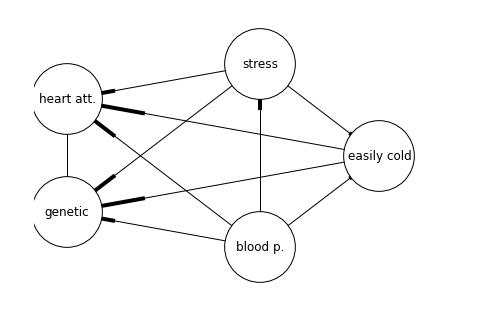

In [59]:
sm_rnd_train_logl, sm_rnd_test_logl = evaluate_net(
    learn_net(Y_train_small, score=bic, var_ord=[3, 0, 1, 4, 2]),
    Y_train_small, 
    Y_test
)

### Standard Order, Log-Likelihood Score

/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/home/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


Avg. train log-likelihood: -1.83423322142
Avg. test log-likelihood: nan


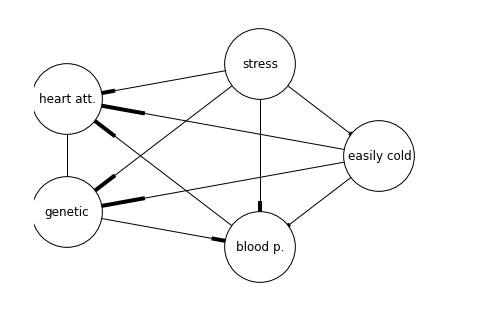

In [60]:
sm_ord_ll_train_logl, sm_ord_ll_test_logl = evaluate_net(
    learn_net(Y_train_small, score=log_likelihood, var_ord=range(5)),
    Y_train_small, 
    Y_test
)

## Medium Train Set

### Pre-defined Structure

Avg. train log-likelihood: -1.86709382175
Avg. test log-likelihood: -1.81746527706


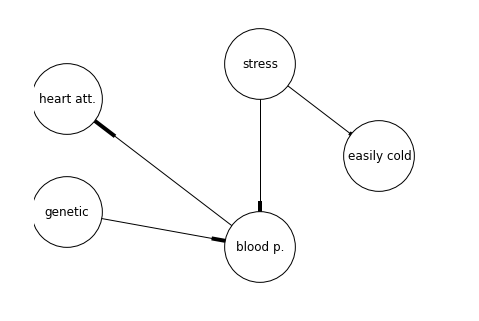

In [61]:
md_gs_train_logl, md_gs_test_logl = evaluate_net(
    learn_params(Y_train_medium),
    Y_train_medium,
    Y_test
)

### Standard Variable Order

Avg. train log-likelihood: -1.86513487194
Avg. test log-likelihood: -1.81935783808


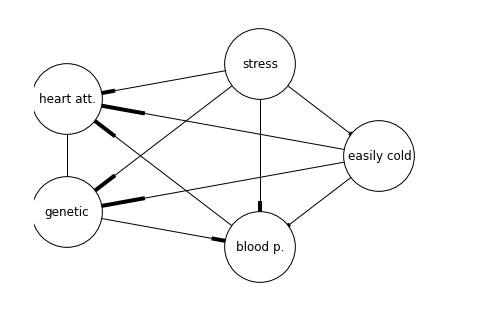

In [62]:
md_ord_train_logl, md_ord_test_logl = evaluate_net(
    learn_net(Y_train_medium, score=bic, var_ord=range(5)),
    Y_train_medium,
    Y_test
)

### Reverse Variable Order

Avg. train log-likelihood: -1.86513487194
Avg. test log-likelihood: -1.81935783808


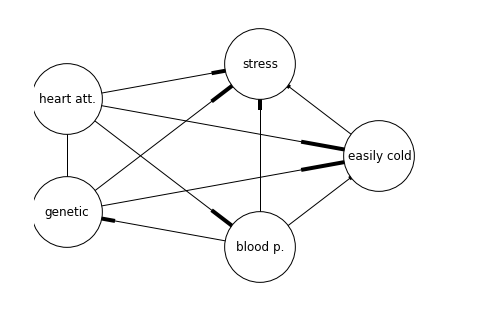

In [63]:
md_rev_train_logl, md_rev_test_logl = evaluate_net(
    learn_net(Y_train_medium, score=bic, var_ord=range(5)[::-1]),
    Y_train_medium,
    Y_test
)

### "Random" Variable Order

In [64]:
md_rnd_train_logl, md_rnd_test_logl = evaluate_net(
    learn_net(Y_train_medium, score=bic, var_ord=[3, 0, 1, 4, 2]),
    Y_train_medium,
    Y_test
)

KeyboardInterrupt: 

### Standard Order, Log-Likelihood Score

In [ ]:
md_ord_ll_train_logl, md_ord_ll_test_logl = evaluate_net(
    learn_net(Y_train_medium, score=log_likelihood, var_ord=range(5)),
    Y_train_medium,
    Y_test
)

## Big Train Set

### Pre-defined Structure

In [ ]:
bg_gs_train_logl, bg_gs_test_logl = evaluate_net(
    learn_params(Y_train_big),
    Y_train_big,
    Y_test
)

### Standard Variable Order

In [ ]:
bg_ord_train_logl, bg_ord_test_logl = evaluate_net(
    learn_net(Y_train_big, score=bic, var_ord=range(5)),
    Y_train_big,
    Y_test
)

### Reverse Variable Order

In [ ]:
bg_rev_train_logl, bg_rev_test_logl = evaluate_net(
    learn_net(Y_train_big, score=bic, var_ord=range(5)[::-1]),
    Y_train_big,
    Y_test
)

### "Random" Variable Order

In [ ]:
bg_rnd_train_logl, bg_rnd_test_logl = evaluate_net(
    learn_net(Y_train_big, score=bic, var_ord=[3, 0, 1, 4, 2]),
    Y_train_big,
    Y_test
)

### Standard Variable Order, Log-Likelihood Score

In [ ]:
bg_ord_ll_train_logl, bg_ord_ll_test_logl = evaluate_net(
    learn_net(Y_train_big, score=log_likelihood, var_ord=range(5)),
    Y_train_big,
    Y_test
)

# Compare Test Set Performance given Train Set Size

In [ ]:
def compare_train_size(given_test_loss, ord_test_loss, rev_test_loss, rnd_test_loss, ord_ll_test_loss):
    plt.figure(figsize=(15, 10))
    plt.plot(ord_test_loss, marker='d', label='ordered')
    plt.plot(rev_test_loss, marker='d', label='reverse')
    plt.plot(rnd_test_loss, marker='d', label='random')
    plt.plot(ord_ll_test_loss, marker='d', label='ordered log-l')
    plt.plot(given_test_loss, marker='d', label='given structure')
    plt.xlim(-0.25, 2.25)
    plt.xticks([0, 1, 2], ['Small', 'Medium', 'Large'])
    plt.ylabel('Test Data Log-Likelihood')
    plt.xlabel('Train Set')
    plt.legend(loc='best')

In [ ]:
compare_train_size([sm_gs_test_logl, md_gs_test_logl, bg_gs_test_logl],
                   [sm_ord_test_logl, md_ord_test_logl, bg_ord_test_logl],
                   [sm_rev_test_logl, md_rev_test_logl, bg_rev_test_logl],
                   [sm_rnd_test_logl, md_rnd_test_logl, bg_rnd_test_logl],
                   [sm_ord_ll_test_logl, md_ord_ll_test_logl, bg_ord_ll_test_logl],
                   )